In [8]:
# Импорт необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import pickle

In [9]:
# Загрузка данных MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [10]:
# Подготовка данных
train_images = train_images.reshape((60000, 28, 28, 1)) / 255.0  # Нормализация и изменение формы для CNN
test_images = test_images.reshape((10000, 28, 28, 1)) / 255.0    # Нормализация и изменение формы для CNN
train_labels = to_categorical(train_labels)  # One-hot кодирование меток
test_labels = to_categorical(test_labels)    # One-hot кодирование меток

In [11]:
# Построение модели
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))  # Сверточный слой
model.add(MaxPooling2D((2, 2)))  # Подвыборка (Max Pooling)
model.add(Conv2D(64, (3, 3), activation='relu'))  # Второй сверточный слой
model.add(MaxPooling2D((2, 2)))  # Подвыборка (Max Pooling)
model.add(Conv2D(64, (3, 3), activation='relu'))  # Третий сверточный слой
model.add(Flatten())  # Преобразование в 1D
model.add(Dense(64, activation='relu'))  # Полносвязный слой
model.add(Dropout(0.5))  # Регуляризация с использованием Dropout
model.add(Dense(10, activation='softmax'))  # Выходной слой для классификации

In [12]:
# Компиляция модели
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [13]:
# Обучение модели
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8062 - loss: 0.5891 - val_accuracy: 0.9797 - val_loss: 0.0722
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9709 - loss: 0.1048 - val_accuracy: 0.9847 - val_loss: 0.0492
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9793 - loss: 0.0715 - val_accuracy: 0.9864 - val_loss: 0.0444
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9840 - loss: 0.0571 - val_accuracy: 0.9868 - val_loss: 0.0451
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9866 - loss: 0.0470 - val_accuracy: 0.9880 - val_loss: 0.0471
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9892 - loss: 0.0370 - val_accuracy: 0.9901 - val_loss: 0.0375
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9905 - loss: 0.0337 - val_accuracy: 0.9881 - val_loss: 0.0474
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9911 - loss: 0.0295 - 

In [14]:
# Оценка модели
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9867 - loss: 0.0568
Test accuracy: 0.9898999929428101


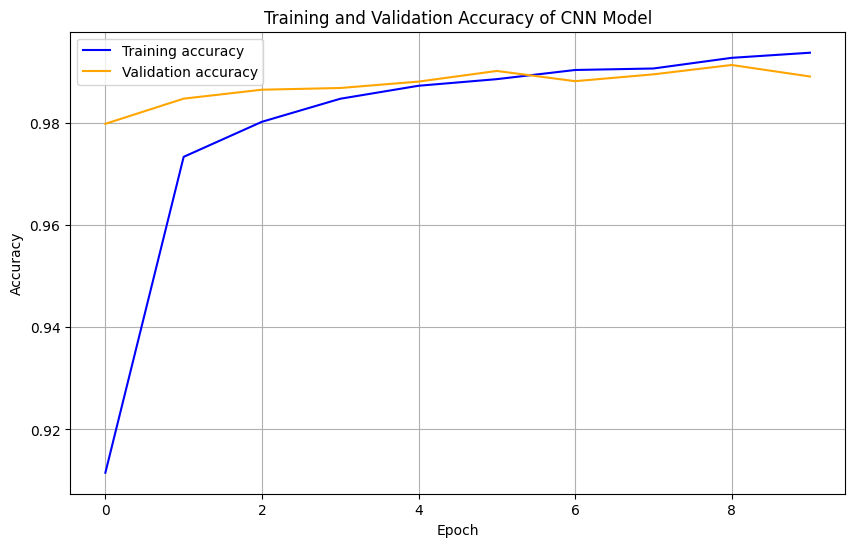

In [15]:
# Визуализация результатов обучения
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy of CNN Model')
plt.legend()
plt.grid(True) 
plt.show()

In [16]:
# Сохранение модели с использованием pickle
with open('model_CNN.pkl', 'wb') as file:
    pickle.dump(model, file)